                  zone  count
33             Oakland    166
16         EastLiberty    145
36               SSSSW     97
14            Downtown     93
31           NorthSide     80
8   BloomfieldOnstreet     71
46              Uptown     61
42      StripDisctrict     56
41        SquirrelHill     55
37           Shadyside     52


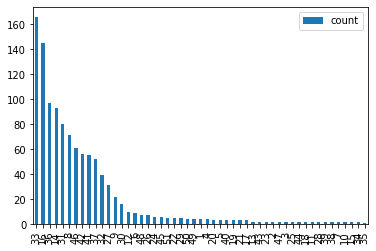

In [10]:
#import the pandas library so we can use it to interpret our data
import pandas as pd                                          

#load all the data from the csv file into a dataframe
df = pd.read_csv('PittsburghParkingMeters.csv')             

#filter so that we only look at active parking meters
df = df[df['status'] == 'Active']                           

#discard the information we don't need, in this case we only care about the zone
df = df[['zone']]

#the csv contained more detailed information about the zones, but we only care about the neighborhood
#so we can remove the excess numbers
df['zone'] = df['zone'].apply(lambda x: '' if pd.isna(x) or not isinstance(x, str) else x)
df['zone'] = df['zone'].apply(lambda x: ''.join([i for i in x if i.isalpha()]))

# Group data by neighborhood and count number of active parking meters in each neighborhood
neighborhood_counts = df.groupby('zone').size().reset_index(name='count')  

# Sort neighborhoods by number of active parking meters
sorted_neighborhoods = neighborhood_counts.sort_values(by='count', ascending=False)

#right now the dataframe still contains a category for meters that didn't have a listed neighborhood
#so to remove that we use the drop function
sorted_neighborhoods = sorted_neighborhoods.drop(0)

# Print top 10 neighborhoods by number of active parking meters
print(sorted_neighborhoods.head(10))

sorted_neighborhoods.plot(kind = "bar")


